# Creating Portfolio based on Risk Apetite

# MAIN FUNCTION


Thank you for completing the questionnaire!


Summary of Your Responses:

Investment Objective: Wealth preservation

Source of Income: Investment Income

Time Horizon: Less than 5 years

Please wait, while we analyze your portfolio.
User's Risk Appetite: Low Risk Appetite


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

          Company    Market Cap  Risk Score
0     RELIANCE.NS  1.991098e+06   44.666667
1        DMART.NS  3.386935e+05   45.833333
2   ADANIPOWER.NS  2.568935e+05   38.166667
3         INFY.NS  8.077721e+05   37.333333
4          TCS.NS  1.632935e+06   35.666667
5   OBEROIRLTY.NS  6.553547e+04   41.000000
6         MRPL.NS  3.323086e+04   40.666667
7         LTTS.NS  6.040810e+04   41.666667
8    HINDPETRO.NS  8.728318e+04   36.000000
9    JYOTHYLAB.NS  2.007348e+04   42.666667
10        SDBL.NS  2.419239e+03   58.500000
11   COALINDIA.NS  3.039767e+05   34.666667
12  VADILALIND.NS  3.151073e+03   56.833333
13  GREENPOWER.NS  2.342932e+03   57.500000
14        NDTV.NS  1.268150e+03   54.333333
15      SANOFI.NS  1.659654e+04   45.500000
16   ESABINDIA.NS  9.438834e+03   35.500000
17  GANESHHOUC.NS  6.826488e+03   56.000000
Here are your Portfolio Details:

Optimizing User Portfolio Portfolio:


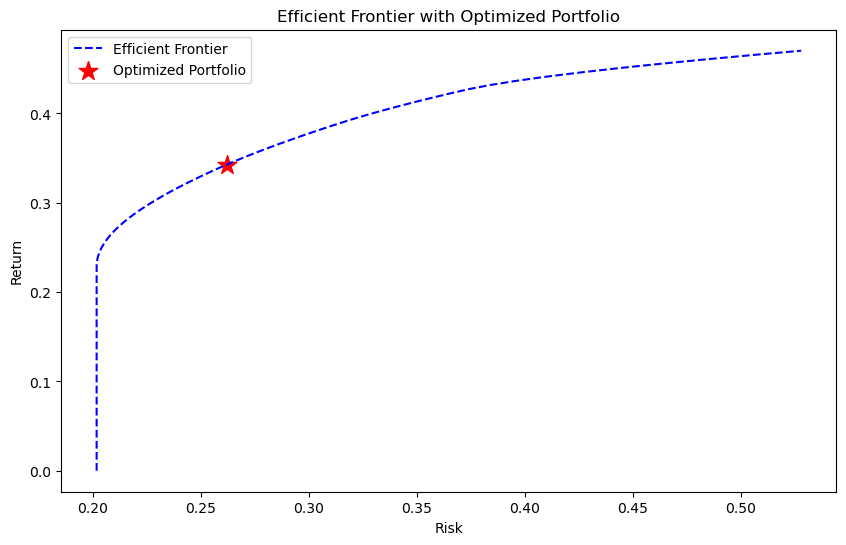

Optimized Portoflio:
           Company   Weight
2   ADANIPOWER.NS  0.20994
3         INFY.NS  0.17560
4          TCS.NS  0.00000
8    HINDPETRO.NS  0.00000
11   COALINDIA.NS  0.25982
16   ESABINDIA.NS  0.35464
Return: 34.27%
Risk: 26.22%
Sharpe Ratio: 1.05



In [32]:
# Main executing function
import pandas as pd
import numpy as np
import yfinance as yf
import datetime
from IPython.display import clear_output
import warnings
from sklearn.preprocessing import MinMaxScaler

warnings.filterwarnings('ignore')


print("Welcome! We are your Portfolio Manager.\nKindly answer a few questions to help us know you.")

# Define options for investment objective, source of income, and expected return
investment_objective_options = {
    '1': 'Retirement savings',
    '2': 'Wealth preservation',
    '3': 'Wealth accumulation'
}

source_of_income_options = {
    '1': 'Salary',
    '2': 'Debt',
    '3': 'Investment Income'
}

time_horizon_options = {
    '1': 'Less than 5 years',
    '2': 'Between 5-10 years',
    '3': 'More than 10 years'
}

# Function to ask a question with options
def ask_question_with_options(question, options):
    print(question)
    for key, value in options.items():
        print(f"{key}. {value}")
    choice = input("Enter the number corresponding to your choice: ")
    return options.get(choice)

# Ask investment objective
investment_objective = ask_question_with_options("Q. What is your primary investment objective?", investment_objective_options)

# Ask source of income
source_of_income = ask_question_with_options("\nQ. What is your source of investment income?", source_of_income_options)

# Ask expected return
time_horizon = ask_question_with_options("\nQ. For how long do you wish to invest?", time_horizon_options)

clear_output(wait=True)  # Clear previous output

print("\nThank you for completing the questionnaire!")
print("\n\nSummary of Your Responses:")
print("\nInvestment Objective:", investment_objective)
print("\nSource of Income:", source_of_income)
print("\nTime Horizon:", time_horizon)

print("\nPlease wait, while we analyze your portfolio.")


user_risk = categorize_risk_appetite(investment_objective, source_of_income, time_horizon)
print("User's Risk Appetite:", user_risk)


ticker_symbol = ['RELIANCE.NS','DMART.NS','ADANIPOWER.NS','INFY.NS','TCS.NS','OBEROIRLTY.NS','MRPL.NS','LTTS.NS','HINDPETRO.NS','JYOTHYLAB.NS','SDBL.NS','COALINDIA.NS','VADILALIND.NS','GREENPOWER.NS','NDTV.NS','SANOFI.NS','ESABINDIA.NS', 'GANESHHOUC.NS']
#company data required
risk_scores_df=pd.DataFrame()
Beta_df = pd.DataFrame(columns=['Company', 'Beta Value'])
#loop for iterating through each stock
for ticker in ticker_symbol:
   #calling function to fetch latest data from Yahoo finance 
   company_info, df_historical_prices, df_income_statement, df_balance_sheet=fetching_data(ticker) 
   
   #Fundamental analysis on the returned values
   sector_name,Beta, DE_Ratio, interest_coverage_ratio,pe_ratio, pb_ratio, latest_eps, ROE, ROCE, market_cap = fundamental_analysis(company_info, df_income_statement, df_historical_prices, df_balance_sheet)
   
   Beta_df=pd.concat([Beta_df,pd.DataFrame({'Company':[ticker], 'Beta': [Beta]})], ignore_index=True
                    )
    #technical analysis to get the latest buy or sell signal
   rsi_signal, latest_macd_signal, mean_return, std_dev,mean_return = technical_analysis(df_historical_prices)

   #calculating risk score by creating bands and normalising different metrics to get a comparable score
   score=risk_score(sector_name,DE_Ratio, interest_coverage_ratio, pe_ratio,
               pb_ratio, ROE, ROCE, rsi_signal, latest_macd_signal, mean_return, std_dev, market_cap)
   #storing the risk scores in a dataframe corresponding to the company
   risk_scores_df = pd.concat([risk_scores_df, pd.DataFrame({'Company': [ticker], 'Market Cap': [market_cap], 'Risk Score': [score]})], ignore_index=True)
print(risk_scores_df)
# Assume portfolio function returns a DataFrame
portfolios = portfolio(risk_scores_df, user_risk)  # This should be a DataFrame

# Convert to DataFrame if not already
if isinstance(portfolios, pd.DataFrame):
    portfolio_df = portfolios
else:
    portfolio_df = pd.DataFrame(portfolios)

# Create a dictionary for analyze_portfolios
portfolio_dict = {"User Portfolio": portfolio_df}  # Portfolio name as the key

print("Here are your Portfolio Details:\n")
# Call analyze_portfolios with the correct dictionary structure
analyze_portfolios(portfolio_dict)






   

# FETCHING DATA

In [24]:


# ticker symbol of the company

def fetching_data(ticker): 
    company_data = yf.Ticker(ticker)

#  Retrieve company information
    company_info = dict(company_data.info)
    historical_prices = company_data.history(period="5y")  # Use period argument
    df_historical_prices = pd.DataFrame(historical_prices)
#   print(company_info)

# Retrieve financial ratios
    income_statement = company_data.financials
    df_income_statement = pd.DataFrame(income_statement)
#   print(df_income_statement)

# Retrieve balance sheet
    balance_sheet = company_data.balance_sheet
    df_balance_sheet = pd.DataFrame(balance_sheet)
   #   print(df_balance_sheet)

    #returning created dataframes to be used in other functions
    return company_info, df_historical_prices, df_income_statement, df_balance_sheet



# FUNDAMENTAL ANALYSIS

In [23]:
def fundamental_analysis(company_info, df_income_statement, df_historical_prices, df_balance_sheet):
    #Retrieving the Industry name of the company
    sector_name=company_info['sector']
   
    #Retrieving market cap

    market_cap=company_info['marketCap']
    market_cap = market_cap / 1e7
   # print("Market cap of the company: ", market_cap) checking the market cap values format

   #retrieving beta value
    Beta=company_info['beta']
   #Leverage Ratios
   #DE_Ratio=company_info['debtToEquity']
    DE_Ratio = df_balance_sheet.loc['Total Debt'].iloc[0]/df_balance_sheet.loc['Stockholders Equity'].iloc[0]
#   print("DE_Ratio: ",DE_Ratio)
 
    interest_coverage_ratio= df_income_statement.loc['EBIT'].iloc[0]/df_income_statement.loc['Interest Expense'].iloc[0] 
 
   #P/E ratio
    pe_ratio= df_historical_prices['Close'].iloc[-1]/df_income_statement.loc['Basic EPS'].iloc[0]
  
   #P/B Ratio
    pb_ratio = company_info['priceToBook']

   #Earnings Per Share
    latest_eps=df_income_statement.loc['Basic EPS'].iloc[0]

   #PROFITABILITY RATIO
   
   #Return On Equity
    ROE= df_income_statement.loc['Net Income'].iloc[0]/df_balance_sheet.loc['Stockholders Equity'].iloc[0]
   
   #Return on Capital Employed

    CL=df_balance_sheet[12:66].loc['Current Liabilities'].iloc[0]
    TA=df_balance_sheet[12:66].loc['Total Assets'].iloc[0]
    Capital_Employed=TA-CL
    ROCE=df_income_statement.loc['EBIT'].iloc[0]/Capital_Employed

    return sector_name, Beta, DE_Ratio, interest_coverage_ratio,pe_ratio, pb_ratio, latest_eps, ROE, ROCE, market_cap 




    

# TECHNICAL ANALYSIS

In [22]:
import numpy as np

def technical_analysis(df_historical_prices):
    data = df_historical_prices
    window = 14
    
    # Calculate log returns
    df_historical_prices['log_return'] = np.log(df_historical_prices['Close'] / df_historical_prices['Close'].shift(1))

    # Calculate mean return (average daily log return)
    mean_return = (df_historical_prices['log_return'].mean()*100)
   
    # Calculate standard deviation (volatility) of log returns
    std_dev = (df_historical_prices['log_return'].std())

    def calculate_rsi(data, window):
        delta = data['Close'].diff()
        gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
        rs = gain / loss
        rsi_values = 100 - (100 / (1 + rs))
        return rsi_values

    rsi_values = calculate_rsi(data, window)
    
    # Identify overbought and oversold conditions
    latest_rsi_value = rsi_values[-1]  # Get the last RSI value
    if latest_rsi_value > 70:
        rsi_signal = 0  # Sell signal
    elif latest_rsi_value < 30:
        rsi_signal = -1  # Buy signal
    else:
        rsi_signal = 0

    def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
        short_ema = data['Close'].ewm(span=short_window, min_periods=1, adjust=False).mean()
        long_ema = data['Close'].ewm(span=long_window, min_periods=1, adjust=False).mean()
        macd_line = short_ema - long_ema
        signal_line = macd_line.ewm(span=signal_window, min_periods=1, adjust=False).mean()
        histogram = macd_line - signal_line
        return macd_line, signal_line, histogram

    def macd(macd_line, signal_line):
        macd_signals = []
        prev_signal = None
        for macd_val, signal_val in zip(macd_line, signal_line):
            if macd_val > signal_val:
                if prev_signal != 1:
                    macd_signals.append(1)
                    prev_signal = 1
            elif macd_val < signal_val:
                if prev_signal != -1:
                    macd_signals.append(-1)
                    prev_signal = -1
            else:
                macd_signals.append(0)
        return macd_signals
    
    # Calculate MACD
    macd_line, signal_line, histogram = calculate_macd(df_historical_prices)

    # Generate buy and sell signals
    macd_signal = macd(macd_line, signal_line)
    
    latest_macd_signal = macd_signal[-1]  # Get the last MACD signal
    return rsi_signal, latest_macd_signal, mean_return, std_dev, mean_return


# RISK SCORE 

In [28]:
def risk_score(sector_name, DE_Ratio, interest_coverage_ratio, pe_ratio,
               pb_ratio, ROE, ROCE, rsi_signal, macd_signal, mean_return, std_dev, market_cap):
    score_band = [10, 20, 30]
    
    # Define weights for each factor
    weights = {
        "DE_Ratio": 0.08,
        "interest_coverage_ratio": 0.05,
        "pe_ratio": 0.05,
        "pb_ratio": 0.02,
        "ROE": 0.05,
        "ROCE": 0.10,
        "mean_return": 0.20,
        "std_dev": 0.20,
        "rsi_signal": 0.05,
        "macd_signal": 0.05,
        "market_cap": 0.15
    }
    
    sector_to_ticker = {
        "energy": "^CNXENERGY",
        "consumer cyclical": "^CNXAUTO",
        'financial services': "NIFTY_FIN_SERVICE.NS",
        'healthcare': "NIFTY_HEALTHCARE.NS",
        'utilities': "^CNXCMDT",
        'technology': "^CNXIT",
        'real estate': "^CNXREALTY",
        'communication services': "^CNXIT",
        'industrials': "^CNXENERGY",
        'consumer defensive': "^CNXFMCG"
    }

    # Get the ticker code corresponding to the sector name
    ticker_code = sector_to_ticker.get(sector_name.lower(), None)

    if ticker_code:
        # Load sector data
        sec_historical_prices = yf.download(ticker_code, period="5y")
        
        # Calculate log returns for the sector historical prices
        sec_historical_prices['log_return'] = np.log(sec_historical_prices['Close'] / sec_historical_prices['Close'].shift(1))

        # Calculate the mean of the log returns (annualized)
        annual_return = (sec_historical_prices['log_return'].mean() * 252)  # Multiply by 252 to annualize
        sec_return = annual_return * 100  # Convert to percentage


     #  print("sec_dev", sec_dev)

        # Define condition ranges for each parameter based on industry
        industry_conditions = {
            "energy": {
                "DE_Ratio": [0.5, 1],
                "interest_coverage_ratio": [5,20],
                "pe_ratio": [10,25],
                "pb_ratio": [1.65, 2.47],
                "ROE": [0.10,0.30],
                "ROCE": [0.10,0.20],
                "market_cap" : [5000, 20000],
                "mean_return": None,  # No specific range, to be calculated later

            },
            "consumer cyclicals": {
                "DE_Ratio": [0.1, 0.5],
                "interest_coverage_ratio": [20, 60],
                "pe_ratio": [20, 60],
                "pb_ratio": [2, 8],
                "ROE": [0.10,0.20],
                "ROCE": [0.10, 0.25],
                "market_cap" : [5000, 20000] ,               
                "mean_return": None,  # No specific range, to be calculated later

            },
            "financial services": {
               "DE_Ratio": [5,13],
               "interest_coverage_ratio": [1, 2],
                "pe_ratio": [12, 25],
                "pb_ratio": [2, 6],
                "ROE": [0.10, 0.40],
                "ROCE": [0.03,0.10],
                "market_cap" : [5000, 20000] ,               
                "mean_return": None,  # No specific range, to be calculated later

            },
            "healthcare": {
               "DE_Ratio": [0.1, 0.5],
               "interest_coverage_ratio": [20, 40],
                "pe_ratio": [35, 60],
                "pb_ratio": [3, 10],
                "ROE": [0.09,0.25],
                "ROCE": [0.10,0.25],
                "market_cap" : [5000, 20000] ,               
                "mean_return": None,  # No specific range, to be calculated later

            },               
            "utilities":{
               "DE_Ratio": [0.2, 1.2],
               "interest_coverage_ratio": [2, 10],
                "pe_ratio": [20, 60],
                "pb_ratio": [0, 6],
                "ROE": [0.05, 0.25],
                "ROCE": [0.07, 0.20],
                "market_cap" : [5000, 20000] ,               
                "mean_return": None,  # No specific range, to be calculated later

            },
            "technology":{
               "DE_Ratio": [0, 0.5],
               "interest_coverage_ratio": [20, 55],
                "pe_ratio": [15,35],
                "pb_ratio": [5,15],
                "ROE": [0.10, 0.35],
                "ROCE": [0.15,0.35],
                "market_cap" : [5000, 20000] ,               
                "mean_return": None,  # No specific range, to be calculated later

            }, 
            "real estate":{
               "DE_Ratio": [0.2, 1.5],
               "interest_coverage_ratio": [2, 10],
                "pe_ratio": [20, 60],
                "pb_ratio": [2, 8],
                "ROE": [0.03, 0.09],
                "ROCE": [0.04, 0.09],
                "market_cap" : [5000, 20000] ,               
                "mean_return": None,  # No specific range, to be calculated later

            },
            "communication services":{
               "DE_Ratio": [0, 0.5],
               "interest_coverage_ratio": [20, 55],
                "pe_ratio": [15, 35],
                "pb_ratio": [5, 15],
                "ROE": [0.10, 0.35],
                "ROCE": [0.15,0.35],
                "market_cap" : [5000, 20000],                
                "mean_return": None,  # No specific range, to be calculated later

            },
            "industrials":{
               "DE_Ratio": [0.5, 1],
               "interest_coverage_ratio": [5, 20],
                "pe_ratio": [10,25],
                "pb_ratio": [1.65, 2.47],
                "ROE": [0.10,0.30],
                "ROCE": [0.10,0.20],
                "market_cap" : [5000, 20000],                
                "mean_return": None,  # No specific range, to be calculated later
   
            },   
            "consumer defensive":{
               "DE_Ratio": [0, 0.6],
               "interest_coverage_ratio": [100, 160],
                "pe_ratio": [50, 80],
                "pb_ratio": [15, 35],
                "ROE": [0.20, 0.50],
                "ROCE": [0.30, 0.60],
                "market_cap" : [5000, 20000] ,              
                "mean_return": None,  # No specific range, to be calculated later
            }
            }
            
        
        conditions = industry_conditions.get(sector_name.lower(), {})
        
        # Define reverse and normal conditions
        reverse_conditions = ["interest_coverage_ratio", "ROE", "ROCE", "log_return", "market_cap"]
        normal_conditions = ["DE_Ratio", "pe_ratio", "pb_ratio"]

        # Function to calculate score based on sector conditions
        def sector_score(value, bounds, reverse=False):
            if bounds:
                if reverse:
                    if value < bounds[0]:  # High risk
                        return score_band[2]
                    elif bounds[0] <= value <= bounds[1]:  # Medium risk
                        return score_band[1]
                    else:  # Low risk
                        return score_band[0]
                else:
                    if value < bounds[0]:  # Low risk
                        return score_band[0]
                    elif bounds[0] <= value <= bounds[1]:  # Medium risk
                        return score_band[1]
                    else:  # High risk
                        return score_band[2]
            return 0
    
        # Calculate raw scores for each factor
        raw_scores = []
        for parameter, bounds in conditions.items():
            value = locals()[parameter]  # Get the value of the parameter
            
            if parameter in reverse_conditions:
                score = sector_score(value, bounds, reverse=True)
            elif parameter in normal_conditions:
                score = sector_score(value, bounds, reverse=False)
            else:
                score = 0  # Handle case where no condition is defined
            
            raw_scores.append(score)
        
        # Compare stock's mean return with sector return
        mean_return_bounds = [sec_return - 5, sec_return + 5]  # Define a comparison margin
        mean_return_score = sector_score(mean_return * 100, mean_return_bounds, reverse=False)
        
        # Append mean return score to raw scores
        raw_scores.append(mean_return_score)
        
        # Normalize the raw scores
        scaler = MinMaxScaler()
        normalized_scores = scaler.fit_transform(np.array(raw_scores).reshape(-1, 1)).flatten()
        
        # Create a mapping for parameters to their normalized scores
        normalized_scores_dict = dict(zip(list(conditions.keys()) + ["mean_return"], normalized_scores))
        
        # Add technical analysis signals
        if rsi_signal == 1:
            normalized_scores_dict["rsi_signal"] = 0.5
        elif rsi_signal == -1:
            normalized_scores_dict["rsi_signal"] = 1
        else:
            normalized_scores_dict["rsi_signal"] = 0
        
        if macd_signal == 1:
            normalized_scores_dict["macd_signal"] = 0.5
        elif macd_signal == -1:
            normalized_scores_dict["macd_signal"] = 1
        else:
            normalized_scores_dict["macd_signal"] = 0 

        # Apply weights to normalized scores
        weighted_score = (
            weights["DE_Ratio"] * normalized_scores_dict.get("DE_Ratio", 0) +
            weights["interest_coverage_ratio"] * normalized_scores_dict.get("interest_coverage_ratio", 0) +
            weights["pe_ratio"] * normalized_scores_dict.get("pe_ratio", 0) +
            weights["pb_ratio"] * normalized_scores_dict.get("pb_ratio", 0) +
            weights["ROE"] * normalized_scores_dict.get("ROE", 0) +
            weights["ROCE"] * normalized_scores_dict.get("ROCE", 0) +
            weights["mean_return"] * normalized_scores_dict.get("mean_return", 0) +
            weights["rsi_signal"] * normalized_scores_dict.get("rsi_signal", 0) +
            weights["macd_signal"] * normalized_scores_dict.get("macd_signal", 0) +
            weights["market_cap"] * normalized_scores_dict.get("market_cap", 0)
        )
        
        # Scale the final score (optional)
        risk_score = weighted_score * 100

        return risk_score

# CATEGORIZING RISK APPETITE OF USER BASED ON USER INPUT

In [20]:
# Define the categorize_risk_appetite function
def categorize_risk_appetite(investment_objective, source_of_income, time_horizon):
    # Assign scores based on user's answers
    objective_score = 0
    income_score = 0
    time_horizon_score = 0
    
    # Assign scores based on investment objective
    if investment_objective.lower() == 'retirement savings':
        objective_score += 3
    elif investment_objective.lower() == 'wealth preservation':
        objective_score += 1
    elif investment_objective.lower() == 'wealth accumulation':
        objective_score += 2
    
    # Assign scores based on source of income
    if source_of_income.lower() == 'salary':
        income_score += 3
    elif source_of_income.lower() == 'debt':
        income_score += 2
    elif source_of_income.lower() == 'investment income':
        income_score += 1
    
    # Assign scores based on expected return
    if time_horizon.lower() == 'more than 10 years':
        time_horizon_score += 3
    elif time_horizon.lower() == 'between 5-10 years':
        time_horizon_score += 2
    elif time_horizon.lower() == 'less than 5 years':
        time_horizon_score += 1
    
    # Calculate total score
    total_score = objective_score + income_score + time_horizon_score
    #print(total_score)
    # Categorize risk appetite based on total score
    if total_score >= 7:
        return "High Risk Appetite"
    elif total_score < 4:
        return "Low Risk Appetite"
    else:
        return "Medium Risk Appetite"


# ASSIGNING RISK APPETITE PORTFOLIOS

In [31]:
def create_portfolios(risk_scores_df):
    low_risk_portfolio = risk_scores_df[risk_scores_df['Risk Score'] <= 40]
    medium_risk_portfolio = risk_scores_df[(risk_scores_df['Risk Score'] > 40) & (risk_scores_df['Risk Score'] < 50)]
    high_risk_portfolio = risk_scores_df[risk_scores_df['Risk Score'] >= 50]
    
    return {
        'Low Risk': low_risk_portfolio,
        'Medium Risk': medium_risk_portfolio,
        'High Risk': high_risk_portfolio
    }


# CALLING INDIVIDUAL RISK SPECIFIC PORTFOLIOS

In [18]:
def portfolio(risk_scores_df, user_risk):
    # Create portfolios using the create_portfolios function
    portfolios = create_portfolios(risk_scores_df)
    
    # Return the appropriate portfolio based on user risk appetite
    if user_risk == "Low Risk Appetite": 
        return portfolios['Low Risk']
    elif user_risk == "Medium Risk Appetite":
        return portfolios['Medium Risk']   
    else:
        return portfolios['High Risk']

# CREATING OPTIMISED RISK SPECIFIC PORTFOLIO

In [17]:
from pypfopt import EfficientFrontier, CovarianceShrinkage, expected_returns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def optimize_portfolio(portfolio_df, risk_free_rate=0.068):
    # Initialize 'Weight' column if it doesn't exist
    if 'Weight' not in portfolio_df.columns:
        portfolio_df['Weight'] = 1 / len(portfolio_df)  # Equal weight initially
    
    # Fetch historical prices for each asset to calculate returns and covariance matrix
    tickers = portfolio_df['Company'].tolist()
    returns = pd.DataFrame()
    
    for ticker in tickers:
        _, df_historical_prices, _, _ = fetching_data(ticker)
        df_historical_prices['Log Returns'] = np.log(df_historical_prices['Close'] / df_historical_prices['Close'].shift(1))
        returns[ticker] = df_historical_prices['Log Returns'].dropna()
    
    # Check if returns DataFrame is not empty
    if returns.empty:
        raise ValueError("No returns data available for covariance matrix calculation.")
    
    # Calculate the covariance matrix from the historical returns
    covariance_matrix = returns.cov()
    
    # Annualize the covariance matrix
    annual_covariance_matrix = covariance_matrix * 252
    
    # Ensure covariance matrix is symmetric
    annual_covariance_matrix = (annual_covariance_matrix + annual_covariance_matrix.T) / 2

    # Calculate annualized returns from daily log returns
    annualized_returns = returns.mean() * 252  # Annualize the mean of log returns
    
    # Ensure annualized returns and covariance matrix dimensions match
    mu = portfolio_df.set_index('Company').reindex(annualized_returns.index)['Annualized Return']
    if len(mu) != annual_covariance_matrix.shape[0]:
        raise ValueError("Length of annualized returns must match the number of assets in covariance matrix.")
        
    # Create EfficientFrontier object
    ef = EfficientFrontier(mu, annual_covariance_matrix)
    
    # Optimize for maximum Sharpe ratio
    weights = ef.max_sharpe(risk_free_rate=risk_free_rate)
    cleaned_weights = ef.clean_weights()
    
    # Update portfolio_df with optimized weights
    for ticker in portfolio_df['Company']:
        if ticker in cleaned_weights:
            portfolio_df.loc[portfolio_df['Company'] == ticker, 'Weight'] = cleaned_weights[ticker]
        else:
            portfolio_df.loc[portfolio_df['Company'] == ticker, 'Weight'] = 0.0  # Set to zero if missing
    
    return portfolio_df, annual_covariance_matrix, ef


def plot_efficient_frontier(mu, annual_covariance_matrix, optimized_portfolio=None, risk_free_rate=0.068):
    ef = EfficientFrontier(mu, annual_covariance_matrix)
    
    # Calculate the maximum possible return
    max_return = mu.max()
    
    # Generate a range of returns to plot (up to the maximum possible return)
    target_returns = np.linspace(0, max_return, 100)
    frontier_risks = []
    
    for ret in target_returns:
        try:
            ef.efficient_return(ret)
            portfolio_return, portfolio_risk, _ = ef.portfolio_performance(risk_free_rate=risk_free_rate)
            frontier_risks.append(portfolio_risk)
        except ValueError:
            frontier_risks.append(np.nan)
    
    # Remove NaN values
    frontier_risks = np.array(frontier_risks)
    target_returns = np.array(target_returns)
    valid = ~np.isnan(frontier_risks)
    
    plt.figure(figsize=(10, 6))
    plt.plot(frontier_risks[valid], target_returns[valid], 'b--', label='Efficient Frontier')
    
    # Plot the optimized portfolio if provided
    if optimized_portfolio:
        # Handle if optimized_portfolio is a tuple of (return, risk)
        if len(optimized_portfolio) == 2:
            opt_return, opt_risk = optimized_portfolio
            plt.scatter(opt_risk, opt_return, color='red', marker='*', s=200, label='Optimized Portfolio')
        else:
            print("Warning: Optimized portfolio should have exactly two values (return and risk).")
    
    plt.xlabel('Risk')
    plt.ylabel('Return')
    plt.title(f'Efficient Frontier with Optimized Portfolio')
    plt.legend()
    plt.show()

def analyze_portfolios(portfolios, risk_free_rate=0.068):
    for name, portfolio_df in portfolios.items():
        print(f"Optimizing {name} Portfolio:")
        
        # Fetch data and calculate return and risk for each stock in portfolio
        for index, row in portfolio_df.iterrows():
            ticker = row['Company']
        
            # Fetch historical prices for the current stock
            _, df_historical_prices, _, _ = fetching_data(ticker)
        
            # Calculate log daily returns
            df_historical_prices['Log Returns'] = np.log(df_historical_prices['Close'] / df_historical_prices['Close'].shift(1))
            df_historical_prices['Log Returns'] = df_historical_prices['Log Returns'].dropna()
            
            # Calculate mean of log returns as expected return
            expected_return = df_historical_prices['Log Returns'].mean()
        
            # Annualize the expected return
            annualized_return = expected_return * 252  # Assuming 252 trading days in a year
        
            # Calculate standard deviation of log returns as annualized risk
            annualized_risk = df_historical_prices['Log Returns'].std() * np.sqrt(252)  # Annualized volatility
        
            # Update portfolio_df with calculated values
            portfolio_df.loc[index, 'Expected Return'] = expected_return
            portfolio_df.loc[index, 'Annualized Return'] = annualized_return
            portfolio_df.loc[index, 'Annualized Risk'] = annualized_risk
        
        # Optimize portfolio weights and update portfolio_df
        optimized_portfolio_df, annual_covariance_matrix, ef = optimize_portfolio(portfolio_df)
        
        # Get optimized portfolio performance
        optimized_return, optimized_risk, sharpe_ratio = ef.portfolio_performance(risk_free_rate=risk_free_rate)
        
        # Plot Efficient Frontier and the optimized portfolio point
        mu = optimized_portfolio_df.set_index('Company')['Annualized Return']
        plot_efficient_frontier(mu, annual_covariance_matrix, optimized_portfolio=(optimized_return, optimized_risk))
        
        # Print optimized weights
        print("Optimized Portoflio:\n", optimized_portfolio_df[['Company', 'Weight']])
        
        # Print portfolio performance
        print(f"Return: {optimized_return:.2%}")
        print(f"Risk: {optimized_risk:.2%}")
        print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
        print()


In [16]:
def calculate_portfolio_return(portfolio_df):    
    # Calculate weighted return using optimized weights
    portfolio_df['Weighted Return'] = portfolio_df['Annualized Return'] * portfolio_df['Weight']
    portfolio_return = portfolio_df['Weighted Return'].sum()
    return portfolio_return


# Define calculate_portfolio_risk function
def calculate_portfolio_risk(portfolio_df, annual_covariance_matrix):    
    
    # Get the weights directly from the portfolio DataFrame
    weights_array = portfolio_df['Weight'].values  # Extract weights as a NumPy array
    
    # Calculate portfolio variance
    portfolio_variance = np.dot(weights_array.T, np.dot(covariance_matrix, weights_array))
    
    # Portfolio risk (standard deviation)
    portfolio_risk = np.sqrt(portfolio_variance)
    
    print("PORTFOLIO RISK: ", portfolio_risk)
    
    return portfolio_risk





#Define calculate portfolio_beta function
def calculate_portfolio_beta(portfolio_df,Beta_df):
    # Merge portfolio_df with beta_df on 'Company' column
    merged_df = pd.merge(portfolio_df, Beta_df, on='Company', how='left')
    
    # Calculate weighted beta for each asset in the portfolio
    merged_df['Weighted Beta'] = merged_df['Weight'] * merged_df['Beta']
    
    # Calculate portfolio beta
    portfolio_beta = merged_df['Weighted Beta'].sum()
    
    return portfolio_beta



def risk_return(portfolio_df, Beta_df, annual_covariance_matrix):
    
    # Calculate portfolio overall return based on updated (optimized) weights
    portfolio_return = calculate_portfolio_return(portfolio_df)

    # Calculate portfolio risk (standard deviation)
    portfolio_risk = calculate_portfolio_risk(portfolio_df, annual_covariance_matrix)
    
    # Calculate portfolio beta
    portfolio_beta = calculate_portfolio_beta(portfolio_df, Beta_df)
    
    # Risk-free rate
    risk_free_rate = 0.068
    
    # Sharpe and Treynor Ratios
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_risk  # Portfolio risk is the standard deviation
    treynor_ratio = (portfolio_return - risk_free_rate) / portfolio_beta
    
    return portfolio_return, portfolio_risk, sharpe_ratio, treynor_ratio
